<a href="https://colab.research.google.com/github/shreyash321/cnn-image-classification-of-any-object-using-images-from-web/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing_image_downloader
from bing_image_downloader import downloader
import os
length=int(input('enter number of objects to be identified : '))
length+=1
v = 1
x=[]
for v in range(1,length):
  sv=input('enter object {} name : '.format(v))
  #y=str(input('enter person {} name : '.format(i)),'.jpg')
  #y=y+str('.jpg')
  x.append(sv)
  #x.append(y)
#output_dir='dataset'
#txt=[f for f in os.listdir('/content/{}/{}'.format(x[0])) if f.endswith('.jpg')]
  for i in range(len(x)):
    query_string=x[i]+str('.jpg')
    downloader.download(query_string, limit=10, output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)
    gg=['.png','.jpeg','.gif','.bmp']
    j=0
    for j in range(0,len(gg)):
      mydir='/content/dataset/{}'.format(query_string)
      filelist = [ f for f in os.listdir(mydir) if f.endswith("{}".format(gg[j])) ]
      for f in filelist:
        os.remove(os.path.join(mydir, f))
  #os.rename('/content/dataset/{}'.format(s),'{}'.format(sv))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
enter number of objects to be identified : 4
enter object 1 name : chair
[%] Downloading Images to /content/dataset/chair.jpg


[!!]Indexing page: 1

[%] Indexed 8 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Caromb_-_église_chair.JPG/800px-Caromb_-_église_chair.JPG
[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Caromb_-_église_chair.JPG/800px-Caromb_-_église_chair.JPG
[!] Error:: 'ascii' codec can't encode character '\xe9' in position 43: ordinal not in range(128)
[%] Downloading Image #1 from http://www.photo-dictionary.com/photofiles/list/7439/9994rotten_chair.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://fast.clickbooq.com/5b1008-283/citrus-fruit-lgthumb.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://history.info/wp-content/uploads/2016/04/Churchill_sits_on

In [2]:
x

['chair', 'frog', 'table', 'panda']

In [3]:
from keras.backend import dropout
data_dir =r'/content/dataset'
data_val =r'/content/dataset'
batch_size=10
import tensorflow as tf
from keras import layers

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                                data_dir,
                                                                validation_split=0.1, #is it required if I'm gonna use the whole folders and files for training?
                                                                subset="training",
                                                                seed=123,
                                                                image_size=(200,200),
                                                                batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                              data_val,
                                                              validation_split=0.4, #need to check
                                                              subset="validation",
                                                              seed=455,
                                                              image_size=(200,200),
                                                              batch_size=batch_size)


num_classes = 14

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(200,200, 3)),
  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='tanh'),  #from renu
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='elu'),  #from renu
  layers.MaxPooling2D(),
  
  layers.Conv2D(128, 3, padding='same', activation='tanh'),  #from renu
  layers.MaxPooling2D(),
  layers.Dropout(.2),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.3),             #prevent overfitting        

  layers.Flatten(),
  layers.Dense(512, activation='sigmoid'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam', #adam
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Found 40 files belonging to 4 classes.
Using 36 files for training.
Found 40 files belonging to 4 classes.
Using 16 files for validation.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                              

['chair.jpg', 'frog.jpg', 'panda.jpg', 'table.jpg']
2


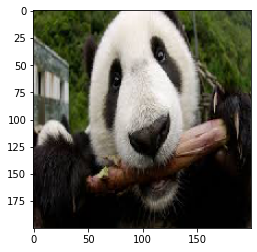

In [6]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
dir_path='/content/images.jpg'
img=image.load_img(dir_path,target_size=(200,200))
#for i in os.listdir(dir_path):
#img=image.load_img(dir_path+'//'+i,target_size=(200,200))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=model.predict(images)
val=(val.argmax())
print(val_ds.class_names)
plt.imshow(img)
print(val)